## Assignment 3

#### Sophia Whitaker

#### - Data Composites based on Pacific Decadal Oscillation index


In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point  
import cartopy.mpl.ticker as cticker

### Open PDO index dataset, fix times, and turn into Data Array

In [2]:
path='/shared/ccsm4/kpegion/obs2/CLIM_INDICES/'
file='pdo.data'
index_name='pdo'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-9.9','-9.90'])
df.drop(df.tail(5).index,inplace=True)

In [3]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1948,-0.11,-0.74,-0.03,-1.33,-0.23,0.08,-0.92,-1.56,-1.74,-1.32,-0.89,-1.70
1949,-2.01,-3.60,-1.00,-0.53,-1.07,-0.70,-0.56,-1.30,-0.93,-1.41,-0.83,-0.80
1950,-2.13,-2.91,-1.13,-1.20,-2.23,-1.77,-2.93,-0.70,-2.14,-1.36,-2.46,-0.76
1951,-1.54,-1.06,-1.90,-0.36,-0.25,-1.09,0.70,-1.37,-0.08,-0.32,-0.28,-1.68
1952,-2.01,-0.46,-0.63,-1.05,-1.00,-1.43,-1.25,-0.60,-0.89,-0.35,-0.76,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
2014,0.30,0.38,0.97,1.13,1.80,0.82,0.70,0.67,1.08,1.49,1.72,2.51
2015,2.45,2.30,2.00,1.44,1.20,1.54,1.84,1.56,1.94,1.47,0.86,1.01
2016,1.53,1.75,2.40,2.62,2.35,2.03,1.25,0.52,0.45,0.56,1.88,1.17


In [4]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'
print(start_date)

1948-1-01


In [5]:
print(end_date)

2018-12-01


In [6]:
print(df.index)

Index(['1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object', name=0)


In [7]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=852, freq='MS')

In [8]:
clim_index=df.T.unstack().values

In [9]:
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='pdo')
ds_index

<xarray.Dataset>
Dimensions:  (time: 852)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2018-12-01
Data variables:
    pdo      (time) object '-0.11' '-0.74' '-0.03' -1.33 ... 0.09 nan nan nan

In [10]:
ds_index['pdo']=ds_index['pdo'].astype(np.float)


In [11]:
ds_index

<xarray.Dataset>
Dimensions:  (time: 852)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2018-12-01
Data variables:
    pdo      (time) float64 -0.11 -0.74 -0.03 -1.33 -0.23 ... 0.09 nan nan nan

In [12]:
print(ds_index['pdo'].values)

[-0.11 -0.74 -0.03 -1.33 -0.23  0.08 -0.92 -1.56 -1.74 -1.32 -0.89 -1.7
 -2.01 -3.6  -1.   -0.53 -1.07 -0.7  -0.56 -1.3  -0.93 -1.41 -0.83 -0.8
 -2.13 -2.91 -1.13 -1.2  -2.23 -1.77 -2.93 -0.7  -2.14 -1.36 -2.46 -0.76
 -1.54 -1.06 -1.9  -0.36 -0.25 -1.09  0.7  -1.37 -0.08 -0.32 -0.28 -1.68
 -2.01 -0.46 -0.63 -1.05 -1.   -1.43 -1.25 -0.6  -0.89 -0.35 -0.76  0.04
 -0.57 -0.07 -1.12  0.05  0.43  0.29  0.74  0.05 -0.63 -1.09 -0.03  0.07
 -1.32 -1.61 -0.52 -1.33  0.01  0.97  0.43  0.08 -0.94  0.52  0.72 -0.5
  0.2  -1.52 -1.26 -1.97 -1.21 -2.44 -2.35 -2.25 -1.95 -2.8  -3.08 -2.75
 -2.48 -2.74 -2.56 -2.17 -1.41 -1.7  -1.03 -1.16 -0.71 -2.3  -2.11 -1.28
 -1.82 -0.68  0.03 -0.58  0.57  1.76  0.72  0.51  1.59  1.5  -0.32 -0.55
  0.25  0.62  0.25  1.06  1.28  1.33  0.89  1.06  0.29  0.01 -0.18  0.86
  0.69 -0.43 -0.95 -0.02  0.23  0.44 -0.5  -0.62 -0.85  0.52  1.11  0.06
  0.3   0.52 -0.21  0.09  0.91  0.64 -0.27 -0.38 -0.94  0.09 -0.23  0.17
  1.18  0.43  0.09  0.34 -0.06 -0.61 -1.22 -1.13 -2.01

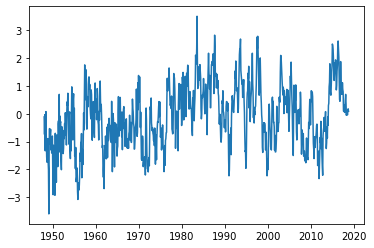

In [13]:
plt.plot(ds_index['time'],ds_index['pdo'])

### Define Warm, Cool, and Neutral PDO

In [14]:
warm=ds_index['pdo'].where(ds_index['pdo']>=1)

cool=ds_index['pdo'].where(ds_index['pdo']<=-1)

neutral=ds_index['pdo'].where(np.logical_and(ds_index['pdo']<1,ds_index['pdo']>-1))

In [15]:
print('Warm PDO:',warm.count(dim='time').values)

print('Cool PDO:',cool.count(dim='time').values)

print('Neutral PDO:',neutral.count(dim='time').values)

Warm PDO: 146
Cool PDO: 190
Neutral PDO: 513


In [16]:
counts=[warm.count(dim='time').values, cool.count(dim='time').values,neutral.count(dim='time').values]
counts

[array(146), array(190), array(513)]

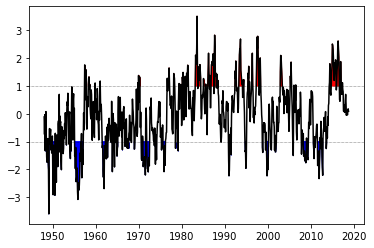

In [17]:
plt.plot(ds_index['time'],ds_index['pdo'],'k')
plt.fill_between(ds_index['time'],1,warm,color='red')
plt.fill_between(ds_index['time'],-1,cool,color='blue')
plt.axhline(1,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-1,color='black',linewidth=0.5,linestyle='dotted')

### Open my data set of precipitation values over India

In [18]:
data_file='/homes/swhitak9/clim680data/monthly_precip_India_total.nc'

data_pr=xr.open_dataset(data_file, decode_times=False)

data_pr

<xarray.Dataset>
Dimensions:  (lat: 129, lon: 135, time: 1428)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 1.425e+03 1.426e+03 1.427e+03
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Sep 01 11:33:12 2020: cdo mergetime rainfall1_by2nc_mon...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [19]:
data_pr['time']=pd.date_range(start='01-01-1901',end='12-31-2019',freq='MS')
data_pr['time']

<xarray.DataArray 'time' (time: 1428)>
array(['1901-01-01T00:00:00.000000000', '1901-02-01T00:00:00.000000000',
       '1901-03-01T00:00:00.000000000', ..., '2019-10-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2019-12-01

In [20]:
data_pr['pr']

<xarray.DataArray 'pr' (time: 1428, lat: 129, lon: 135)>
[24868620 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2019-12-01
Attributes:
    long_name:  Rainfall from India Meteorological Department(0.25*0.25)
    units:      mm/day

In [21]:
data_pr=data_pr.sel(time=slice(ds_index['time'][0], ds_index['time'][-1]))

data_pr

<xarray.Dataset>
Dimensions:  (lat: 129, lon: 135, time: 852)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2018-12-01
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Sep 01 11:33:12 2020: cdo mergetime rainfall1_by2nc_mon...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [22]:
data_pr_climo=data_pr.groupby('time.month').mean()
data_pr_anom=data_pr.groupby('time.month')-data_pr_climo

data_pr_anom

<xarray.Dataset>
Dimensions:  (lat: 129, lon: 135, time: 852)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2018-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    pr       (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [23]:
warm_precip=data_pr_anom.sel(time=warm.dropna(dim='time')['time']).mean(dim='time')

cool_precip=data_pr_anom.sel(time=cool.dropna(dim='time')['time']).mean(dim='time')

neutral_precip=data_pr_anom.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')

In [24]:
comp_precip=[warm_precip,cool_precip,neutral_precip]
comp_precip

[<xarray.Dataset>
 Dimensions:  (lat: 129, lon: 135)
 Coordinates:
   * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
   * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
 Data variables:
     pr       (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan,
 <xarray.Dataset>
 Dimensions:  (lat: 129, lon: 135)
 Coordinates:
   * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
   * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
 Data variables:
     pr       (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan,
 <xarray.Dataset>
 Dimensions:  (lat: 129, lon: 135)
 Coordinates:
   * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
   * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
 Data variables:
     pr       (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan]

Text(0.5, 0.98, 'Composite Precipitation Anomalies over India during PDO')

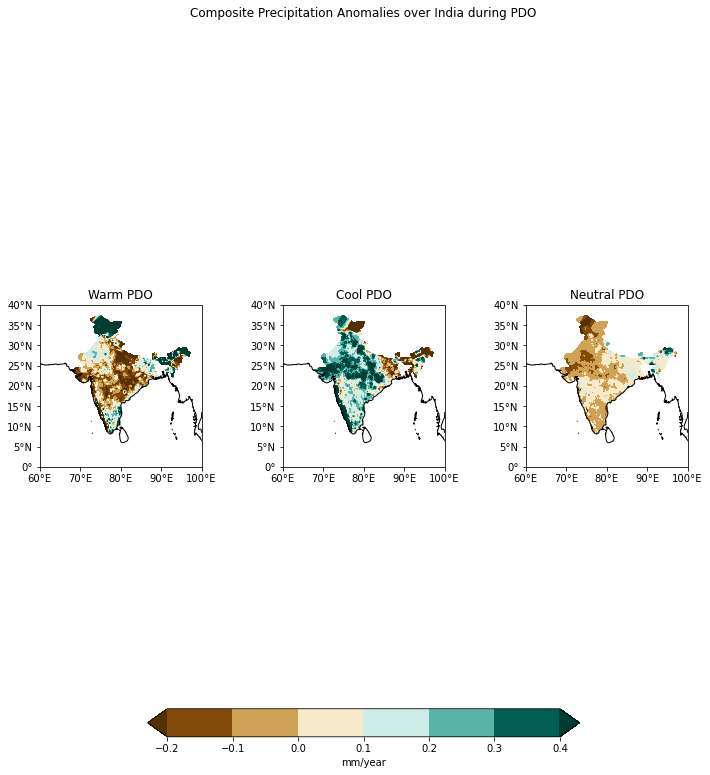

In [35]:
clevs=np.arange(-0.2,0.5,0.1)

labels=['Warm PDO','Cool PDO','Neutral PDO']

fig,axs= plt.subplots(nrows=1,ncols=3,subplot_kw={'projection':ccrs.PlateCarree()},
                     figsize=(10,13))

axs=axs.flatten()

for i,pdo in enumerate(comp_precip):
    
    data=comp_precip[i]['pr']
    
    data,lons=add_cyclic_point(data,coord=comp_precip[i]['lon'])
    
    cs=axs[i].contourf(lons,comp_precip[i]['lat'],data,clevs,
                       transform=ccrs.PlateCarree(),
                      cmap='BrBG',extend='both')
    
    axs[i].set_xticks(np.arange(60,101,10), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    
    axs[i].set_yticks(np.arange(0,41,5), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    
    axs[i].coastlines()
    
    axs[i].set_title(labels[i])
    


    
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.5, hspace=0.5)

    
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.03])

cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/year')
    
plt.suptitle('Composite Precipitation Anomalies over India during PDO')

### High Composite at (13N, 75E)

Text(0, 0.5, 'PDO Index')

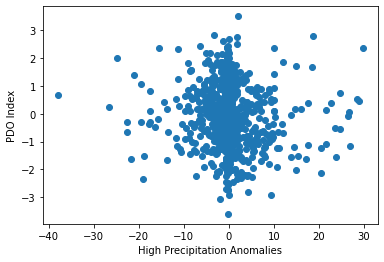

In [32]:
pt1=data_pr_anom.sel(lat=13,lon=75,method='nearest')
plt.scatter(pt1['pr'],ds_index['pdo'])
plt.xlabel('High Precipitation Anomalies')
plt.ylabel('PDO Index')

### Medium Composite at (27N,73E)

Text(0, 0.5, 'PDO Index')

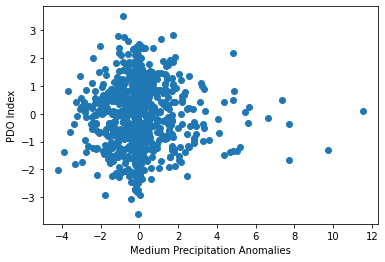

In [33]:
pt2=data_pr_anom.sel(lat=15,lon=78,method='nearest')
plt.scatter(pt2['pr'],ds_index['pdo'])
plt.xlabel('Medium Precipitation Anomalies')
plt.ylabel('PDO Index')

### Low Composite at (29N,73E)

Text(0, 0.5, 'PDO Index')

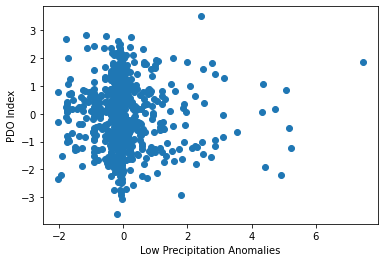

In [31]:
pt3=data_pr_anom.sel(lat=29,lon=73,method='nearest')
plt.scatter(pt3['pr'],ds_index['pdo'])
plt.xlabel('Low Precipitation Anomalies')
plt.ylabel('PDO Index')

In [34]:
diff_precip=[warm_precip-neutral_precip,
            cool_precip-neutral_precip]

<ipython-input-49-0825f5d4c661>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax=fig.add_axes([0.2,0.2,0.6,0.03])


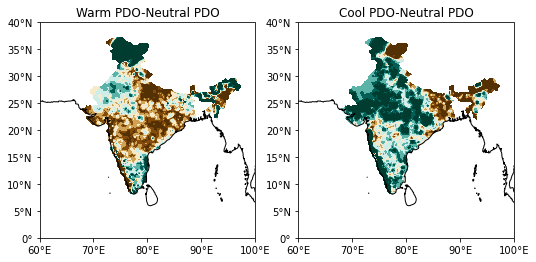

In [49]:
labels=['Warm PDO-Neutral PDO','Cool PDO-Neutral PDO']
clevs=np.arange(-0.2,0.5,0.1)

figs, axs=plt.subplots(nrows=1,ncols=2,
                      subplot_kw={'projection':ccrs.PlateCarree()},
                      figsize=(8.5,11))

axs=axs.flatten()

for i,pdo in enumerate(diff_precip):
    data=diff_precip[i]['pr']
    data,lons=add_cyclic_point(data,coord=diff_precip[i]['lon'])
    cs=axs[i].contourf(lons,diff_precip[i]['lat'],data,clevs,
                      transform=ccrs.PlateCarree(),
                      cmap='BrBG',extend='both')
    
    axs[i].set_xticks(np.arange(60,101,10), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    
    axs[i].set_yticks(np.arange(0,41,5), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)
    
    axs[i].set_title(labels[i])
    axs[i].coastlines()
    
    
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.5)

cbar_ax=fig.add_axes([0.2,0.2,0.6,0.03])
cbar=fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/year')
    